In [17]:
import pandas as pd
import time
from selenium import webdriver
from selenium.webdriver.common.by import By
from webdriver_manager.chrome import ChromeDriverManager

In [18]:
driver = webdriver.Chrome(ChromeDriverManager().install())

C:\Users\Izzham\AppData\Local\Temp\ipykernel_4420\1503906442.py:1: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(ChromeDriverManager().install())


In [3]:
page_url = "https://harrypotter.fandom.com/wiki/Category:Individuals_by_gender"
driver.get(page_url)

In [4]:
gender_categories = driver.find_elements(By.CLASS_NAME,'category-page__member-link')


In [9]:
gender_categories[0].text

'Category:Females'

In [10]:
gender_categories[0].get_attribute('href')

'https://harrypotter.fandom.com/wiki/Category:Females'

In [13]:
gender = driver.find_elements(By.CLASS_NAME,'category-page__member-link')

In [14]:
gender[0].text

'Category:Females'

## Full Code

In [19]:
#Create Driver
driver = webdriver.Chrome(ChromeDriverManager().install())

# Go to character in gender page
page_url = "https://harrypotter.fandom.com/wiki/Category:Individuals_by_gender"
driver.get(page_url)

# find gender
gender_categories = driver.find_elements(By.CLASS_NAME,'category-page__member-link')

genders = []
for category in gender_categories:
    gender_url = category.get_attribute('href')
    gender = category.text
    genders.append({'gender':gender,'url':gender_url})

C:\Users\Izzham\AppData\Local\Temp\ipykernel_4420\1801426800.py:2: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(ChromeDriverManager().install())


In [20]:
genders

[{'gender': 'Category:Females',
  'url': 'https://harrypotter.fandom.com/wiki/Category:Females'},
 {'gender': 'Category:Individuals of unknown or undetermined gender',
  'url': 'https://harrypotter.fandom.com/wiki/Category:Individuals_of_unknown_or_undetermined_gender'},
 {'gender': 'Category:Males',
  'url': 'https://harrypotter.fandom.com/wiki/Category:Males'}]

In [21]:
character = []

for gender in genders:
    driver.get(gender['url'])
    
    character_list = driver.find_elements(By.CLASS_NAME,'category-page__member-link')
    
    for char in character_list:
        character.append({'gender':gender['gender'],'name':char.text})

In [22]:
character

[{'gender': 'Category:Females',
  'name': '1992 Gryffindor vs Slytherin Quidditch match spectators'},
 {'gender': 'Category:Females', 'name': 'Hannah Abbott'},
 {'gender': 'Category:Females', 'name': "Hannah Abbott's mother"},
 {'gender': 'Category:Females', 'name': 'Edith Abernathy'},
 {'gender': 'Category:Females', 'name': 'Ernestina Abutor'},
 {'gender': 'Category:Females', 'name': 'Zoe Accrington'},
 {'gender': 'Category:Females', 'name': 'Aged witch'},
 {'gender': 'Category:Females', 'name': 'Agnes'},
 {'gender': 'Category:Females', 'name': 'Aisha'},
 {'gender': 'Category:Females', 'name': "Aisha's mother"},
 {'gender': 'Category:Females', 'name': 'Sakura Akagi'},
 {'gender': 'Category:Females', 'name': 'Alannis'},
 {'gender': 'Category:Females', 'name': 'Filemina Alchin'},
 {'gender': 'Category:Females', 'name': "Dennis Aldermaston's mother"},
 {'gender': 'Category:Females', 'name': 'Cyprien Alesi'},
 {'gender': 'Category:Females', 'name': 'Badeea Ali'},
 {'gender': 'Category:Fem

In [23]:
df = pd.DataFrame(character)
df

,gender,name
0,Category:Females,1992 Gryffindor vs Slytherin Quidditch match s...
1,Category:Females,Hannah Abbott
2,Category:Females,Hannah Abbott's mother
3,Category:Females,Edith Abernathy
4,Category:Females,Ernestina Abutor
...,...,...
595,Category:Males,Robert Bliss
596,Category:Males,Bloke who fixed the toilet at Leaky Cauldron
597,Category:Males,Jean-Baptiste Bloncourt
598,Category:Males,Bloody Baron


In [31]:
df.to_csv('character.csv')

In [32]:
!pip3 install matplotlib

You should consider upgrading via the 'c:\users\izzham\documents\python scripts\web-harry-potter\path\to\myenv\scripts\python.exe -m pip install --upgrade pip' command.


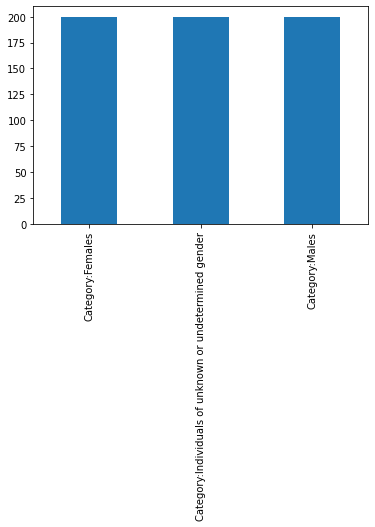

In [33]:
import matplotlib.pyplot as plt 

character_df = pd.DataFrame(character)

character_df['gender'].value_counts().plot(kind='bar')
plt.show()